## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  45.126886  1380.553444  0.801326   8.454584  1.533301
1  15.319231   903.992630  0.451861   7.415469  1.516045
2  56.916595  1538.273426  0.539406  10.637579  1.728606
3  34.960448   607.121873  0.875131   7.007873  1.585378
4  42.384209  1546.583595  0.722108  10.517759  1.578252


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9980567	total: 57ms	remaining: 56.9s
1:	learn: 0.9883948	total: 57.5ms	remaining: 28.7s
2:	learn: 0.9775349	total: 57.9ms	remaining: 19.2s
3:	learn: 0.9670705	total: 58.4ms	remaining: 14.5s
4:	learn: 0.9569820	total: 58.9ms	remaining: 11.7s
5:	learn: 0.9486436	total: 59.5ms	remaining: 9.86s
6:	learn: 0.9374249	total: 59.9ms	remaining: 8.49s
7:	learn: 0.9257738	total: 60.4ms	remaining: 7.49s
8:	learn: 0.9165784	total: 60.8ms	remaining: 6.69s
9:	learn: 0.9073093	total: 61.2ms	remaining: 6.06s
10:	learn: 0.8991627	total: 61.7ms	remaining: 5.54s
11:	learn: 0.8893934	total: 62.2ms	remaining: 5.12s
12:	learn: 0.8809971	total: 62.6ms	remaining: 4.75s
13:	learn: 0.8722157	total: 63.1ms	remaining: 4.44s
14:	learn: 0.8620116	total: 63.5ms	remaining: 4.17s
15:	learn: 0.8521912	total: 63.8ms	remaining: 3.92s
16:	learn: 0.8411194	total: 64.1ms	remaining: 3.71s
17:	learn: 0.8339988	total: 64.5ms	remaining: 3.52s
18:	learn: 0.8261070	total: 64.9ms	remaining: 

121:	learn: 0.3689321	total: 109ms	remaining: 788ms
122:	learn: 0.3670848	total: 110ms	remaining: 784ms
123:	learn: 0.3651446	total: 110ms	remaining: 779ms
124:	learn: 0.3627410	total: 111ms	remaining: 775ms
125:	learn: 0.3603638	total: 111ms	remaining: 771ms
126:	learn: 0.3585781	total: 111ms	remaining: 766ms
127:	learn: 0.3566131	total: 112ms	remaining: 763ms
128:	learn: 0.3540264	total: 112ms	remaining: 759ms
129:	learn: 0.3520168	total: 113ms	remaining: 755ms
130:	learn: 0.3505401	total: 113ms	remaining: 752ms
131:	learn: 0.3485339	total: 114ms	remaining: 747ms
132:	learn: 0.3467896	total: 114ms	remaining: 743ms
133:	learn: 0.3449354	total: 114ms	remaining: 739ms
134:	learn: 0.3432342	total: 115ms	remaining: 735ms
135:	learn: 0.3410774	total: 115ms	remaining: 730ms
136:	learn: 0.3394516	total: 115ms	remaining: 727ms
137:	learn: 0.3369715	total: 116ms	remaining: 724ms
138:	learn: 0.3352549	total: 116ms	remaining: 720ms
139:	learn: 0.3334960	total: 117ms	remaining: 717ms
140:	learn: 

299:	learn: 0.1705978	total: 186ms	remaining: 434ms
300:	learn: 0.1702135	total: 187ms	remaining: 433ms
301:	learn: 0.1691577	total: 187ms	remaining: 433ms
302:	learn: 0.1681434	total: 188ms	remaining: 432ms
303:	learn: 0.1676532	total: 188ms	remaining: 430ms
304:	learn: 0.1670820	total: 188ms	remaining: 429ms
305:	learn: 0.1662342	total: 189ms	remaining: 428ms
306:	learn: 0.1658889	total: 189ms	remaining: 427ms
307:	learn: 0.1654817	total: 190ms	remaining: 426ms
308:	learn: 0.1646892	total: 190ms	remaining: 425ms
309:	learn: 0.1644278	total: 191ms	remaining: 425ms
310:	learn: 0.1639981	total: 191ms	remaining: 424ms
311:	learn: 0.1633715	total: 191ms	remaining: 422ms
312:	learn: 0.1624841	total: 192ms	remaining: 421ms
313:	learn: 0.1615731	total: 192ms	remaining: 420ms
314:	learn: 0.1611432	total: 193ms	remaining: 419ms
315:	learn: 0.1608049	total: 193ms	remaining: 418ms
316:	learn: 0.1601543	total: 193ms	remaining: 416ms
317:	learn: 0.1598115	total: 194ms	remaining: 415ms
318:	learn: 

548:	learn: 0.0783302	total: 291ms	remaining: 239ms
549:	learn: 0.0779908	total: 292ms	remaining: 239ms
550:	learn: 0.0776707	total: 293ms	remaining: 238ms
551:	learn: 0.0774428	total: 293ms	remaining: 238ms
552:	learn: 0.0772277	total: 294ms	remaining: 237ms
553:	learn: 0.0770098	total: 294ms	remaining: 237ms
554:	learn: 0.0768039	total: 295ms	remaining: 236ms
555:	learn: 0.0764014	total: 295ms	remaining: 236ms
556:	learn: 0.0760847	total: 296ms	remaining: 235ms
557:	learn: 0.0758244	total: 296ms	remaining: 234ms
558:	learn: 0.0754480	total: 296ms	remaining: 234ms
559:	learn: 0.0751472	total: 297ms	remaining: 233ms
560:	learn: 0.0748304	total: 297ms	remaining: 233ms
561:	learn: 0.0744654	total: 298ms	remaining: 232ms
562:	learn: 0.0742787	total: 298ms	remaining: 231ms
563:	learn: 0.0739955	total: 299ms	remaining: 231ms
564:	learn: 0.0738011	total: 299ms	remaining: 230ms
565:	learn: 0.0735947	total: 299ms	remaining: 230ms
566:	learn: 0.0735492	total: 300ms	remaining: 229ms
567:	learn: 

725:	learn: 0.0483883	total: 368ms	remaining: 139ms
726:	learn: 0.0483003	total: 369ms	remaining: 138ms
727:	learn: 0.0482582	total: 369ms	remaining: 138ms
728:	learn: 0.0480142	total: 370ms	remaining: 137ms
729:	learn: 0.0477755	total: 370ms	remaining: 137ms
730:	learn: 0.0477246	total: 370ms	remaining: 136ms
731:	learn: 0.0474970	total: 371ms	remaining: 136ms
732:	learn: 0.0473852	total: 371ms	remaining: 135ms
733:	learn: 0.0471570	total: 372ms	remaining: 135ms
734:	learn: 0.0469757	total: 372ms	remaining: 134ms
735:	learn: 0.0468809	total: 372ms	remaining: 133ms
736:	learn: 0.0467282	total: 373ms	remaining: 133ms
737:	learn: 0.0466328	total: 373ms	remaining: 133ms
738:	learn: 0.0464192	total: 374ms	remaining: 132ms
739:	learn: 0.0462060	total: 374ms	remaining: 131ms
740:	learn: 0.0460562	total: 375ms	remaining: 131ms
741:	learn: 0.0459692	total: 375ms	remaining: 130ms
742:	learn: 0.0457711	total: 375ms	remaining: 130ms
743:	learn: 0.0456485	total: 376ms	remaining: 129ms
744:	learn: 

961:	learn: 0.0244024	total: 473ms	remaining: 18.7ms
962:	learn: 0.0243276	total: 474ms	remaining: 18.2ms
963:	learn: 0.0242985	total: 474ms	remaining: 17.7ms
964:	learn: 0.0241916	total: 475ms	remaining: 17.2ms
965:	learn: 0.0241447	total: 475ms	remaining: 16.7ms
966:	learn: 0.0241062	total: 475ms	remaining: 16.2ms
967:	learn: 0.0240329	total: 476ms	remaining: 15.7ms
968:	learn: 0.0239610	total: 476ms	remaining: 15.2ms
969:	learn: 0.0238745	total: 477ms	remaining: 14.7ms
970:	learn: 0.0238463	total: 477ms	remaining: 14.2ms
971:	learn: 0.0238186	total: 477ms	remaining: 13.7ms
972:	learn: 0.0237482	total: 477ms	remaining: 13.2ms
973:	learn: 0.0237210	total: 478ms	remaining: 12.8ms
974:	learn: 0.0236192	total: 479ms	remaining: 12.3ms
975:	learn: 0.0235741	total: 479ms	remaining: 11.8ms
976:	learn: 0.0235053	total: 479ms	remaining: 11.3ms
977:	learn: 0.0234225	total: 480ms	remaining: 10.8ms
978:	learn: 0.0234112	total: 480ms	remaining: 10.3ms
979:	learn: 0.0233503	total: 481ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

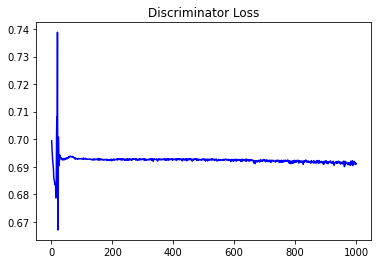

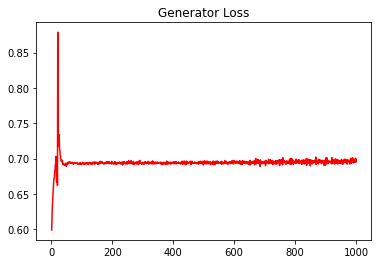

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2599206847623059


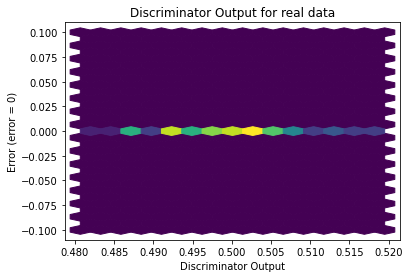

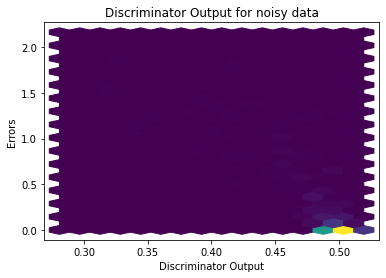

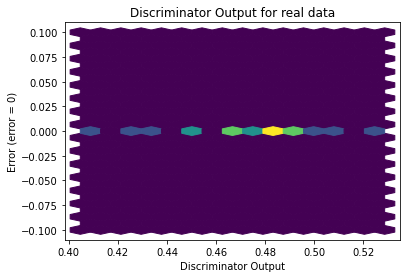

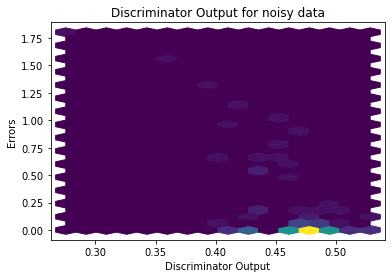

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


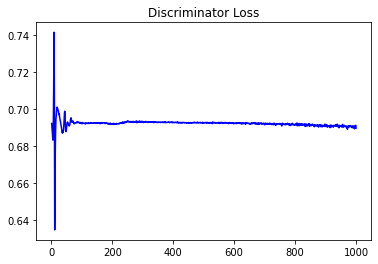

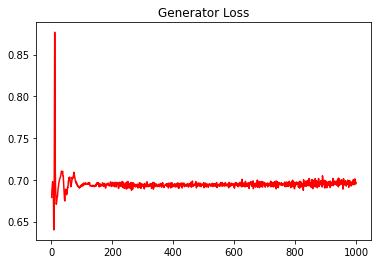

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21000256166729583


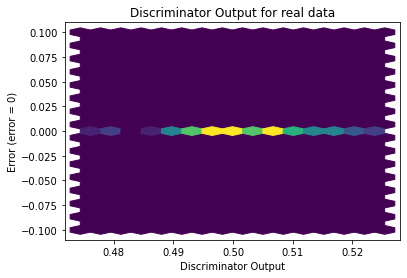

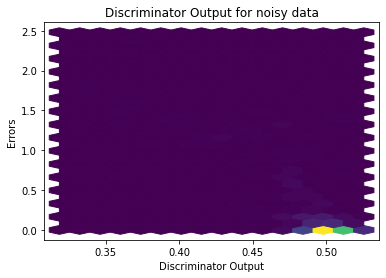

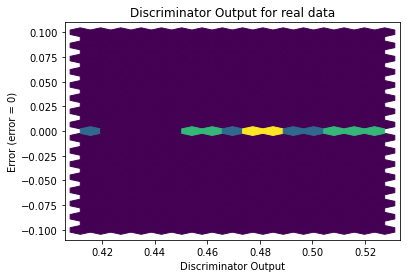

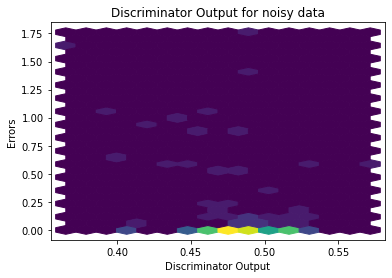

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4229]], requires_grad=True)
